# Diabetes Classification

Dataset link - https://www.kaggle.com/johndasilva/diabetes

## Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [2]:
# Load the dataset 

df=pd.read_csv('kaggle_diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


## Exploring the dataset

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(744, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               744 non-null    int64  
 1   Glucose                   744 non-null    int64  
 2   BloodPressure             744 non-null    int64  
 3   SkinThickness             744 non-null    int64  
 4   Insulin                   744 non-null    int64  
 5   BMI                       744 non-null    float64
 6   DiabetesPedigreeFunction  744 non-null    float64
 7   Age                       744 non-null    int64  
 8   Outcome                   744 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,3.752688,120.892473,68.959677,20.908602,79.534946,32.229704,0.472355,33.142473,0.340054
std,3.335541,31.943115,19.317521,16.311726,111.745897,8.206319,0.326181,11.751286,0.474046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.800000,0.632500,40.250000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

In [11]:
print(len(df))

744


In [12]:
df['Outcome'].value_counts()

0    491
1    253
Name: Outcome, dtype: int64

In [13]:
max(df['Pregnancies'])

17

In [14]:
df[df["Pregnancies"]==17]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


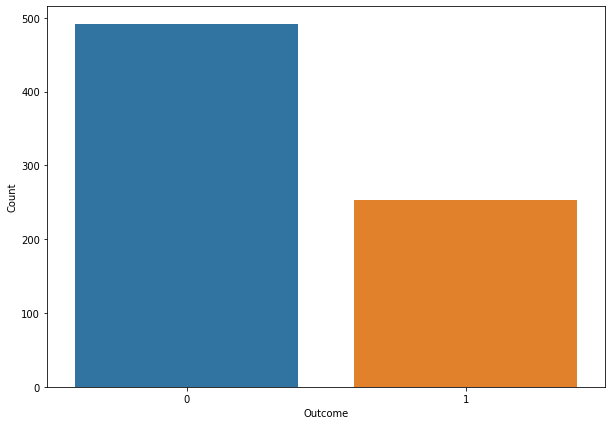

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)

plt.xlabel('Outcome')
plt.ylabel('Count')

plt.show()

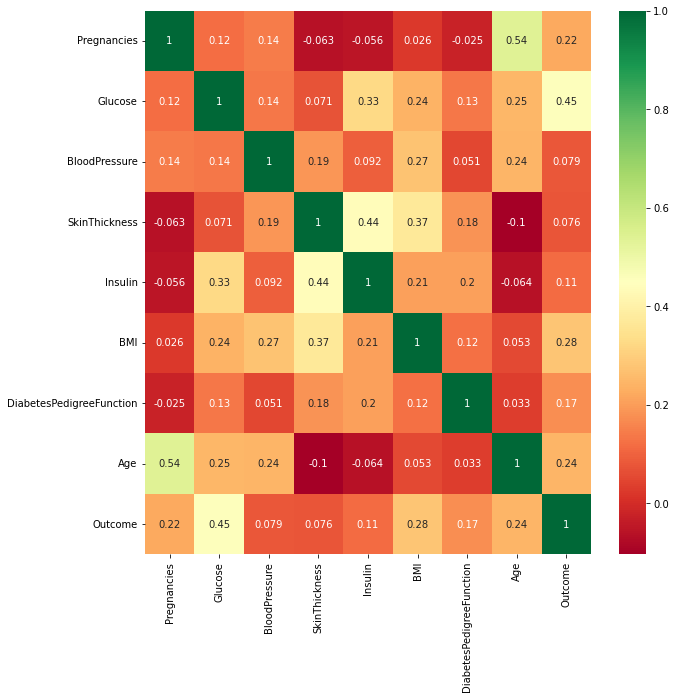

In [16]:
corrmat=df.corr()
features=corrmat.index
plt.figure(figsize=(10,10))
a=sns.heatmap(df[features].corr(),annot=True,cmap="RdYlGn")

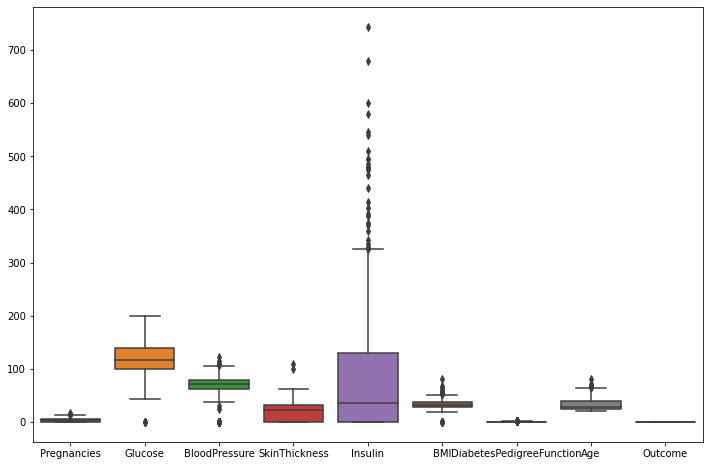

In [17]:
# Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.show()

There is 0 value present in Glucose, Blood pressure, Skin Thickness, Insulin, BMI features, we have to replace it.
There are outliers present in our data so we replace zeros with median of respective features

## Replacing zero values with mean and median

In [18]:
print('Pregnancies: {0}'.format(len(df.loc[df['Pregnancies']==0])))
print('Glucose: {0}'.format(len(df.loc[df['Glucose']==0])))
print('BloodPressure: {0}'.format(len(df.loc[df['BloodPressure']==0])))
print('SkinThickness: {0}'.format(len(df.loc[df['SkinThickness']==0])))
print('Insulin: {0}'.format(len(df.loc[df['Insulin']==0])))
print('BMI: {0}'.format(len(df.loc[df['BMI']==0])))
print('DiabetesPedigreeFunction: {0}'.format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print('Age: {0}'.format(len(df.loc[df['Age']==0])))

Pregnancies: 112
Glucose: 5
BloodPressure: 34
SkinThickness: 215
Insulin: 359
BMI: 10
DiabetesPedigreeFunction: 0
Age: 0


In [19]:
df['Glucose']=np.where(df['Glucose']==0,df['Glucose'].mean(),df['Glucose'])
df['BloodPressure']=np.where(df['BloodPressure']==0,df['BloodPressure'].mean(),df['BloodPressure'])
df['SkinThickness']=np.where(df['SkinThickness']==0,df['SkinThickness'].median(),df['SkinThickness'])
df['Insulin']=np.where(df['Insulin']==0,df['Insulin'].median(),df['Insulin'])
df['BMI']=np.where(df['BMI']==0,df['BMI'].median(),df['BMI'])

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.0,36.0,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,68.959677,23.0,36.0,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21,0


In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

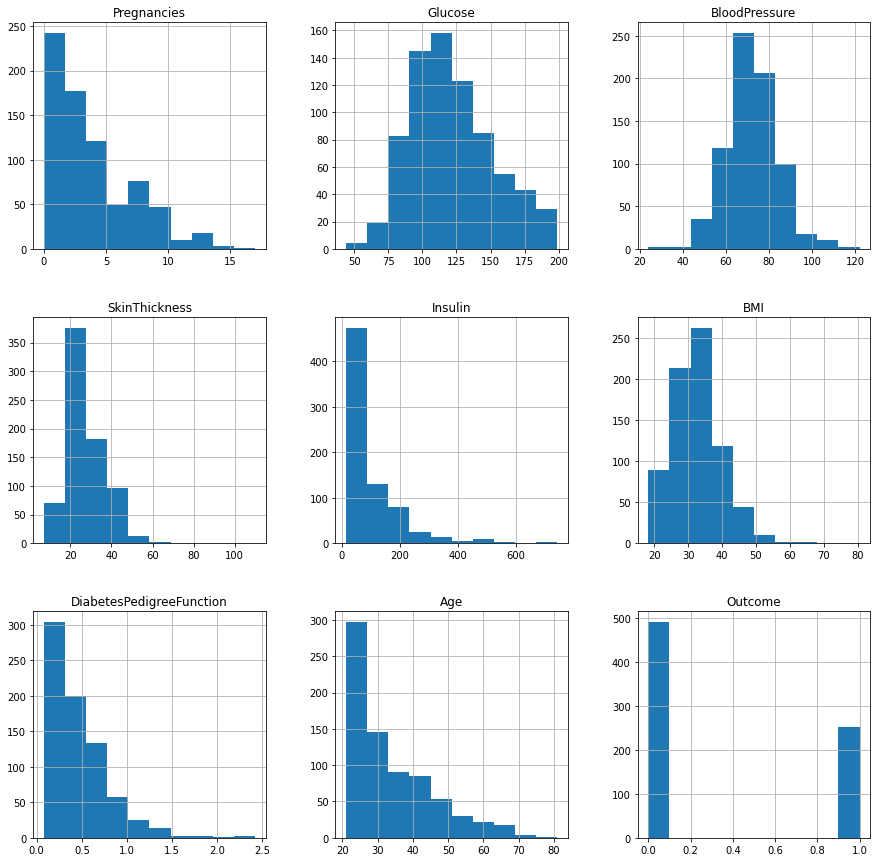

In [22]:
plot = df.hist(figsize = (15,15))

## Model Building

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (595, 8), X_test size: (149, 8)


In [24]:
from sklearn.ensemble import RandomForestClassifier
RandomForest=RandomForestClassifier()
RandomForest=RandomForest.fit(X_train,y_train)

In [25]:
y_pred=RandomForest.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Accuracy Score
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.8187919463087249


In [27]:
# Creating a confusion matrix
print(confusion_matrix(y_test,y_pred))

[[91 10]
 [17 31]]


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       101
           1       0.76      0.65      0.70        48

    accuracy                           0.82       149
   macro avg       0.80      0.77      0.78       149
weighted avg       0.81      0.82      0.81       149



## Predictions

In [29]:
# Prediction 1
y_pred =RandomForest.predict([[2, 81, 72, 15, 76, 30.1, 0.547, 25]])
if y_pred==0:
    print("Great! You don't have diabetes.")
else:
    print('Oops! You have diabetes.')

Great! You don't have diabetes.


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
# Prediction 2
y_pred =RandomForest.predict([[2,138,62,35,0,33.6,0.127,47]])
if y_pred==0:
    print("Great! You don't have diabetes.")
else:
    print('Oops! You have diabetes.')

Oops! You have diabetes.


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [50]:
import joblib
joblib.dump(RandomForest,open("models/model.pkl", 'wb'))